# Task A

## During session, data of iphone purchasing gave very bad accuracy, we discussed some reasons for that .. try to get the highest possible accuracy 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline 


In [ ]:
# import and show data 
dataP = pd.read_csv('/content/iphone_purchase_records.csv')
dataP.head()
def stand(user):
  user['Age']=(user['Age']-(dataP['Age'].mean()))/dataP['Age'].std()
  user['Salary']=(user['Salary']-(dataP['Salary'].mean()))/dataP['Salary'].std()
  return user


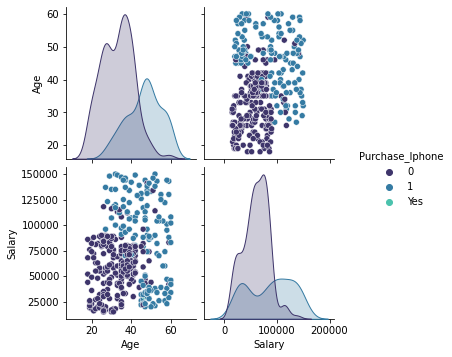

In [ ]:
# check unique values and replace bad one
sns.pairplot(dataP,hue='Purchase_Iphone',palette='mako') # data must be standarized

In [ ]:
dataP['Purchase_Iphone']=dataP['Purchase_Iphone'].replace('Yes',1)
dataP.shape

(400, 3)

In [ ]:
# train the model and ... wait! .. forgot something ?! .. Yes,check nulls and deal with them
dataP.isnull().sum()

Age                 9
Salary             10
Purchase_Iphone     0
dtype: int64

In [ ]:
dataP.dropna(subset =['Age'],inplace=True)

In [ ]:
dataP['Salary'].fillna(dataP['Salary'].mean(),inplace = True)

In [ ]:
dataP.isnull().sum() # null is checked

Age                0
Salary             0
Purchase_Iphone    0
dtype: int64

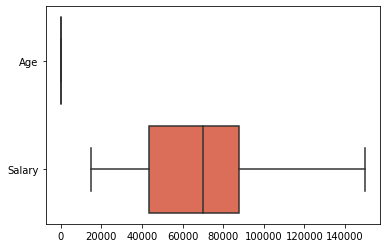

In [ ]:
sns.boxplot(data=dataP.drop(['Purchase_Iphone'],axis=1),orient="h",palette='rocket')  #no outlier

In [ ]:
# here add steps to increase validity of data
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(dataP.drop(['Purchase_Iphone'],axis=1))
arr_sdataP=ss.transform(dataP.drop(['Purchase_Iphone'],axis=1))

sdataP = pd.DataFrame(arr_sdataP,columns=dataP.columns[:-1])
sdataP.head()

,Age,Salary
0,-1.800759,-1.498213
1,-0.269490,-1.468781
2,-1.130829,-0.791830
3,-1.035125,-0.379773
4,-1.800759,0.179447


In [ ]:
# split data using 'train_test_split' function .. search for how using it if you don't remember
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(sdataP,dataP['Purchase_Iphone'],train_size =0.3,random_state=5 )

In [ ]:
# Build knn model, choose best k value
error=[]
for i in range (1,40):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  error.append(np.mean(y_pred != y_test))


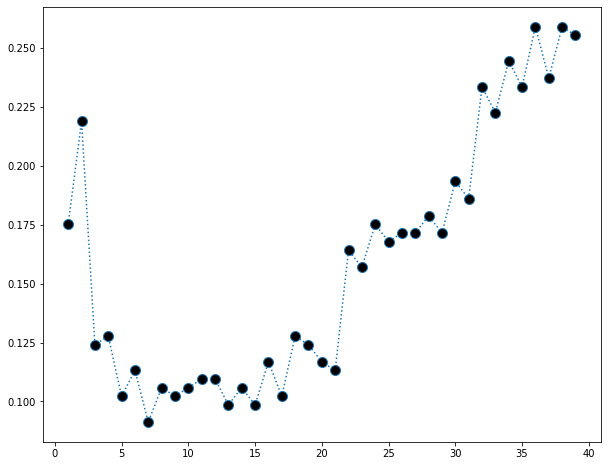

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error,marker='o',linestyle=':',markersize=10,markerfacecolor='black') #k=10


In [ ]:

acc=[]
knn= KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

iy_test=[str(i) for i in y_test] #data was int and we use categorical --> sol : to convert to str()

acc.append(metrics.accuracy_score(iy_test,y_pred)*100)
x_test

,Age,Salary
351,0.496145,1.739376
140,-0.748012,0.562071
244,-0.078081,2.239731
49,-0.843716,0.385475
345,-0.173785,0.856397
...,...,...
385,0.113328,-0.320908
347,1.548893,0.002851
57,-1.035125,-1.468781
194,0.304736,0.032283


In [ ]:
from sklearn.preprocessing import StandardScaler
user=pd.DataFrame({'Age':[25],'Salary':[75000]})    #user interface

userB=stand(user)   

knn= KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred=knn.predict(userB)
y_pred

array(['0'], dtype=object)

# Task B: Solve hands on, but at home 🙇 
## The solution will be uploaded to help you check your understanding

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
# from scipy.spatial import distance

### Task 1: Write Knn Algorithm to predict a numerical value (regression)

In [ ]:
def distance_euclidean(pt1,pt2):
  distance = np.sum( [abs(pt1-pt2)] )
  return distance
def KNN(K,X_test,X,Y):
      y_pred = []
         
      #This line calculates the distance for each row in the X_train from the X_test
      #Then saves them all in a list called distances
      distances=[distance_euclidean(X_test, X.iloc[i]) for i in range(len(X)) ]
      
      #how to get the indexs of a sorted array
      #np.argsort sorts your list in ascending order but return the index of these sorted values
      #In other words Returns the indices that would sort an array
      knn_index= np.argsort(distances)[:K]
      
      #Having the index of the knn we can obtain their class from the Y column 
      labels= [Y.iloc[i] for i in knn_index ]

      #how to get the frequency of an array python
      #This line checks which class is repeated the most and returns it with its frequency 
      #return Counter(labels).most_common(1)
      labels = pd.DataFrame(labels)
      label = labels.mean()


      y_pred.append(label)   
    
      return y_pred

### Task 2: import 'weights' data and predict the wait of a person who is 25 years old and its height is 5.4 feets 

In [ ]:
# read the data 
wdata =pd.read_csv('/content/weights.csv')


In [ ]:
#show the first 5 row of the data 
wdata.head()

,Height,Age,Weight
0,5.00,45,77
1,5.11,26,47
2,5.60,30,55
3,5.90,34,59
4,4.80,40,72


In [ ]:
#code here 
wdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  10 non-null     float64
 1   Age     10 non-null     int64  
 2   Weight  10 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 368.0 bytes


In [ ]:
wdata.isnull().sum()

Height    0
Age       0
Weight    0
dtype: int64

## split data to test and train 

### show columns names 

In [ ]:
wdata.columns

Index(['Height', 'Age', 'Weight'], dtype='object')

#### split data to X_train and Y_train

In [ ]:
X_train=wdata.drop(['Weight'],axis=1)
Y_train=wdata['Weight']
#show X_train
X_train

,Height,Age
0,5.00,45
1,5.11,26
2,5.60,30
3,5.90,34
4,4.80,40
5,5.80,36
6,5.30,19
7,5.80,28
8,5.50,23
9,5.60,32


In [ ]:
#code here
#use Manhatten and KNN algorithm to predict the unknown data  

X_test =pd.DataFrame({'Height':[5.4],'Age':[25]})


print(KNN(2,X_test,X_train,Y_train))

# ها طلع معاك كام ؟


[0    46.0
dtype: float64]


# Task C:

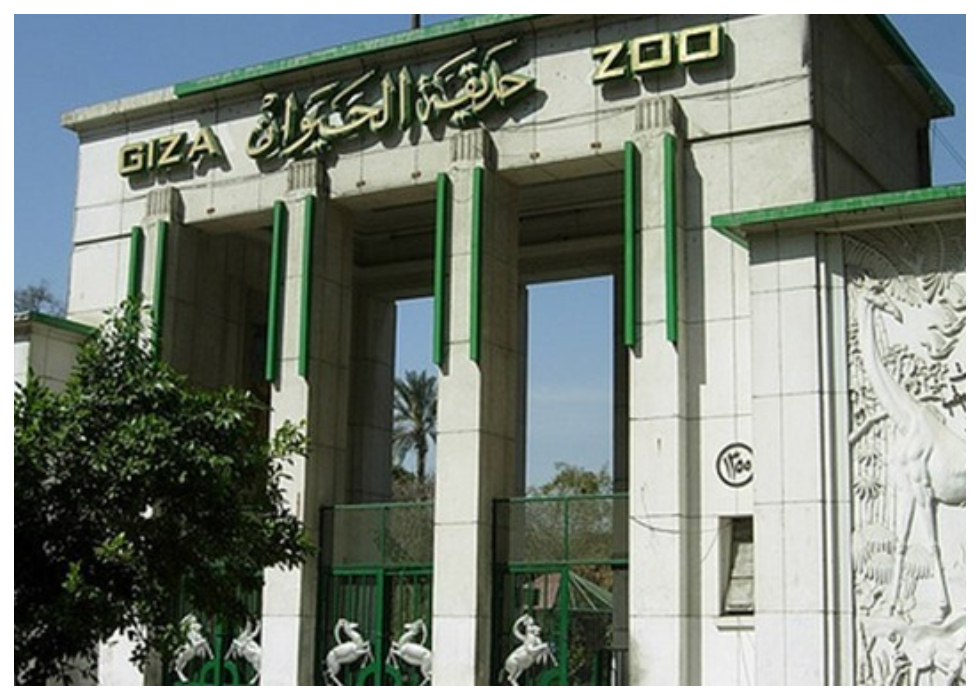

## people are sad that Giza zoo is locked. Howerver, there are many reasons for the shutdown. Mainly, animals records are not updated periodically. Some animals have disappeared from the zoo, and we need to define them. As being interested in machine learning, you decided to make a model to predict disappeared animal type, knowing some features about it. You only know KNN so you gonna use it. Please, help us get animals back 

In [ ]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score 

In [ ]:
# Importing dataset
data = pd.read_csv('/content/Giza zoo.csv',index_col =0)
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
animal_name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
# Data pre processing and EDA
data.isnull().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, aardvark to wren
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   hair        101 non-null    int64
 1   feathers    101 non-null    int64
 2   eggs        101 non-null    int64
 3   milk        101 non-null    int64
 4   airborne    101 non-null    int64
 5   aquatic     101 non-null    int64
 6   predator    101 non-null    int64
 7   toothed     101 non-null    int64
 8   backbone    101 non-null    int64
 9   breathes    101 non-null    int64
 10  venomous    101 non-null    int64
 11  fins        101 non-null    int64
 12  legs        101 non-null    int64
 13  tail        101 non-null    int64
 14  domestic    101 non-null    int64
 15  catsize     101 non-null    int64
 16  class_type  101 non-null    int64
dtypes: int64(17)
memory usage: 14.2+ KB


In [ ]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
data['class_type'].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [ ]:
data.sort_values(by='legs') #i was amazed . what is the animal that has 8 legs :)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
animal_name,,,,,,,,,,,,,,,,,
slowworm,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,3
pitviper,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,3
porpoise,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1
worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
seahorse,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gnat,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
crayfish,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7


In [ ]:
# you need to predict animal class type without relying on its name. Knowing that split data into feature and target
Features = data.drop('class_type',axis=1)
Target = data['class_type']


In [ ]:
# Split Features and Target into train and test
from sklearn.model_selection import train_test_split
xz_train,xz_test,yz_train,yz_test=train_test_split(Features,Target,train_size=0.3,random_state=5)


In [ ]:
# Build your model , how can you know which K to use
error_rate=[]
for i in range(1,30):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(xz_train,yz_train)
  y_pred=knn.predict(xz_test)
  error_rate.append(np.mean(y_pred != yz_test )*100)
  


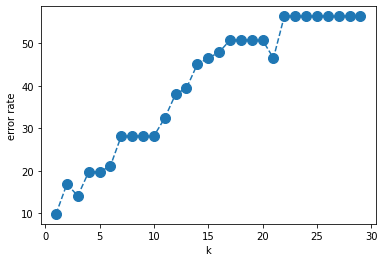

In [ ]:
# plt.figure(figsize=(10,8))
# plt.plot(range(1,30),error_rate,linestyle="dashed",marker='o',markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.set_xlabel('X Label')
# plt.set_ylabel('Y Label')     #gived me error i dont know why :0
fig, ax = plt.subplots() # i searched for diffrent code syntax
ax.plot(range(1,30),error_rate,linestyle="dashed",marker='o',markersize=10)
# Change the labels of the x-axis and y-axis
ax.set_xlabel('k')
ax.set_ylabel('error rate')

# Show the plot
plt.show() # best k = 5

In [ ]:
from sklearn.metrics import confusion_matrix
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(xz_train,yz_train)
y_pred=knn.predict(xz_test)

In [ ]:
acc =metrics.accuracy_score(yz_test, y_pred)
acc

0.7183098591549296

In [ ]:
cm = confusion_matrix(yz_test, y_pred)
print("Confusion Matrix: \n", cm)  #it occures that cm[2][2] equal zero so the model didn't give this target only one time true 

Confusion Matrix: 
 [[28  0  0  3  0  0  0]
 [ 0 16  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 4  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0]
 [ 4  0  0  2  0  0  0]]


In [ ]:
categories=yz_test.unique()
categories

array([7, 1, 4, 6, 2, 5, 3])

In [ ]:
from sklearn.metrics import classification_report
classification_report(yz_test, y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           1       0.65      0.90      0.76        31\n           2       1.00      1.00      1.00        16\n           3       0.00      0.00      0.00         1\n           4       0.58      1.00      0.74         7\n           5       0.00      0.00      0.00         4\n           6       0.00      0.00      0.00         6\n           7       0.00      0.00      0.00         6\n\n    accuracy                           0.72        71\n   macro avg       0.32      0.41      0.36        71\nweighted avg       0.57      0.72      0.63        71\n'

In [ ]:
#               precision    recall  f1-score   support        -->Precision = True Positives / (True Positives + False Positives)

#                                                              -->Recall = True Positives / (True Positives + False Negatives)
#            1       0.65      0.90      0.76        31       
#            2       1.00      1.00      1.00        16        -->support = True Positives + False Positives
#            3       0.00      0.00      0.00         1
#            4       0.58      1.00      0.74         7
#            5       0.00      0.00      0.00         4
#            6       0.00      0.00      0.00         6
#            7       0.00      0.00      0.00         6

#     accuracy                           0.72        71
#    macro avg       0.32      0.41      0.36        71
# weighted avg       0.57      0.72      0.63        71

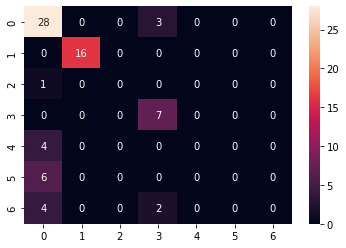

In [ ]:
sns.heatmap(cm ,annot=True)

In [ ]:
df_cm=pd.DataFrame(cm,index=categories,columns=categories)
df_cm

,7,1,4,6,2,5,3
7,28,0,0,3,0,0,0
1,0,16,0,0,0,0,0
4,1,0,0,0,0,0,0
6,0,0,0,7,0,0,0
2,4,0,0,0,0,0,0
5,6,0,0,0,0,0,0
3,4,0,0,2,0,0,0


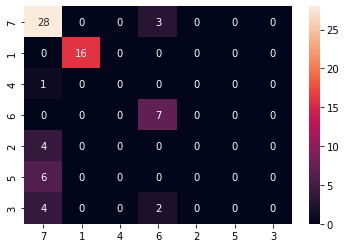

In [ ]:
sns.heatmap(df_cm ,annot=True)